# Introduction

In this project, I'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo. 

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:


* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.
    
Using visualizations, I will try to draw some conclusions and get some insights based on the association between factors such as college Majors, gender patterns, and earning prospects. The main question that will ultimately be answered is if earnings change significantly based on a person's college major. 
 
Some of the questions that will serve as a guide to such conclusions are as follows:
 
 
* Which category of majors have the most students?
* Do students in more popular majors make more money?
* Are male-dominated majors associated with higher earnings?
* How many majors are predominantly male/female?

## Importing libraries
I am going to import all the necessary libraries.

In [36]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#Displaying plots inline
%matplotlib inline


## Loading the dataset
Now I will load the recent_grads.csv dataset and print the first few rows so to see the column names and how they appear in the dataset.

In [6]:
#Reading the dataset
recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


## Checking Basic Information and Preliminary Cleaning

Let's take a look at the top and bottom portions of the dataset


In [7]:
#First five rows.
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [8]:
#Last five rows.
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


## Initial Inferences

The dataset depicts the ranking of various College Majors based on their median earning. it is is ordered in the descending order of Median earning. The major ranked first is the one with highest median earning and the major ranked at the end is the one with lowest median earning.


* Looking at the first row, Petroleum Engineering, a major that falls under Engineering disciplines has the highest median earning among all other majors listed here. The percentage of women is only 12% in this major

* Looking at the percentage of women in the high paying majors, except for the 5th rank, Chemical engineering, the percentage is below 15%. The percentage of women in high paying majors are less from the initial observation.

* Looking at the lowest paying majors, the percentage of women are quite high there, last one reaching 88%.

In [20]:
#Getting summary statistics
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


It appears that there is some data missing in a particular column so I will check and drop those missing values.

In [22]:
#Finding number of rows
raw_data_count = len(recent_grads.index)
print(raw_data_count)

#Dropping missing rows
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads.index)
print(cleaned_data_count)

173
172


Now let's check it.

In [24]:
recent_grads.describe(include = 'all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172,172.000000,172.000000,172.000000,172,172.000000,172.000000,172.00000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
unique,NaN,NaN,172,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,CRIMINAL JUSTICE AND FIRE PROTECTION,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.377907,3895.953488,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,357.941860,31355.80814,...,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,619.680419,50777.42865,...,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.00000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,42.000000,3734.75000,...,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,131.000000,12031.50000,...,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,339.000000,31701.25000,...,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000


Looking at the table above we can see that all the missing values have been dealt with.

## Analysing various datapoints
Now that I have a clean dataset, I can now start looking at the correlations between the various factors.

### Most Popular Major vs Unemployment
I will first go after the popular majors. We have a column in the dataset which represents the total number of students enrolled for a certain major. If I can find the major with the highest number of people, that would be the most popular major.

Will there be a reason for the popularity of the major? Will it be the employment opportunities or the high salary? What factors could be contributing to the popularity. Let's do some visualization to check that.

#### Most Popular Major vs Year Round Employement

<AxesSubplot:title={'center':'Popular Major vs Year Round Employment'}, xlabel='Total', ylabel='Full_time_year_round'>

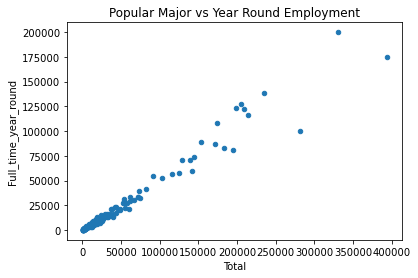

In [24]:
#Scatter Plot to find the correlation between Popular Major (Total) and All Year Round Employement(Full_time_year_round)

recent_grads.plot(x = 'Total', y = 'Full_time_year_round', kind='scatter', 
                     title="Popular Major vs Year Round Employment")

Looks like there is a strong correlation. As the popularity of the major increases( i.e.the total number of students in a certain major increases), the number of students who got full time jobs, year round also increased with a few exceptions.

So it looks like some of these majors are popular for a reason. Let us cross check it by comparing the employment rate and unemployment rate as well.

#### Most Popular Major vs Employment Rate

<AxesSubplot:title={'center':'Popular Major vs Employment Rate'}, xlabel='Total', ylabel='Employed'>

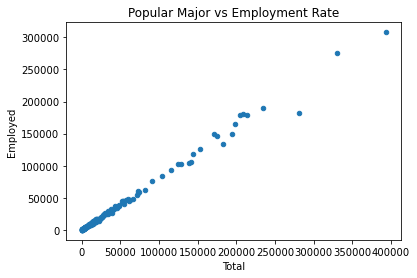

In [22]:
recent_grads.plot(x ='Total', y = 'Employed', kind='scatter', 
                     title="Popular Major vs Employment Rate")

It appears that there is a strong correlation between most popular major and employment rate. So now all we have to do is to check if the opposite case is also true, i.e. if increase in popularity decreases the number of unemployed.

#### Most Popular Major vs Unemployment Rate

<AxesSubplot:title={'center':'Popular Major vs Unemployment Rate'}, xlabel='Total', ylabel='Unemployment_rate'>

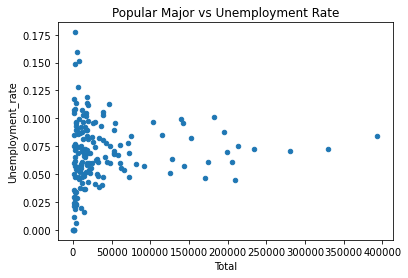

In [21]:
recent_grads.plot(x ='Total', y ='Unemployment_rate', kind='scatter', 
                     title="Popular Major vs Unemployment Rate")

From the look of things, the least popular majors actually have more income potential from this data. This could mean a few things:

* The least popular majors can be difficult to get into or are very specialised majors and offer great earning potential
* The most popular jobs offer better employment, at the same time due to overpopulation, the earning potential is lesser for such majors.
* Or the sample size is too small to make right predictions.


Now that we have infered one of the possible reasons behind certain majors being less popular, let us check if sample size translates into better earning opportunities.

#### Sample Size v/s Earning Potential

Text(0.5, 1.0, 'Sample_size vs Median')

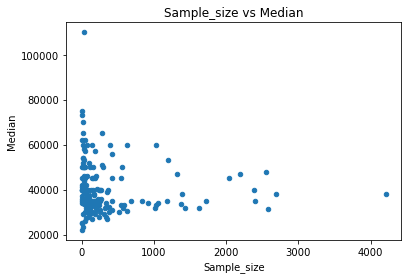

In [14]:
#Scatter plot of sample_size vs Median 
ax = recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter')
ax.set_title('Sample_size vs Median')

I cannit see much of a correlation between sample size and Earning potential but I do see that if the sample size is smaller, there is a higer earning potential. 

In [15]:
recent_grads[['Major','Total', 'Sample_size', 'Median']].sort_values('Total').head(10)

,Major,Total,Sample_size,Median
73,MILITARY TECHNOLOGIES,124.0,4,40000
52,MATHEMATICS AND COMPUTER SCIENCE,609.0,7,42000
112,SOIL SCIENCE,685.0,4,35000
33,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,5,50000
1,MINING AND MINERAL ENGINEERING,756.0,7,75000
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,5,34000
55,SCHOOL STUDENT COUNSELING,818.0,4,41000
2,METALLURGICAL ENGINEERING,856.0,3,73000
172,LIBRARY SCIENCE,1098.0,2,22000
19,COURT REPORTING,1148.0,14,54000


This table is quite interesting since this 10 values the highest paying major and the lowest paying jobs are included.

This table is created in the ascending order of Popularity (or total number of students).

This table tells us that popularity or the course doesn't have much to do with earning option because the 5th least popular major according to the data earns the most and the 8th least popular major earns the 2nd highest.

At the same time, the 9th least major earns the least amount of salary. But the interesting thing in all these three observations are, the sample size available is very small. We are inferring things from 2,3 and 7 sample sets!

In [16]:
recent_grads[['Major','Total', 'Sample_size', 'Median']].sort_values('Total', ascending=False).head(10)

,Major,Total,Sample_size,Median
145,PSYCHOLOGY,393735.0,2584,31500
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,4212,38000
123,BIOLOGY,280709.0,1370,33400
57,GENERAL BUSINESS,234590.0,2380,40000
93,COMMUNICATIONS,213996.0,2394,35000
34,NURSING,209394.0,2554,48000
77,MARKETING AND MARKETING RESEARCH,205211.0,2684,38000
40,ACCOUNTING,198633.0,2042,45000
137,ENGLISH LANGUAGE AND LITERATURE,194673.0,1436,32000
78,POLITICAL SCIENCE AND GOVERNMENT,182621.0,1387,38000


Looking at the majors with the highest number of people enrolled. Psychology appears to be the most popular major but clearly it is not the highest earner. In fact out of the top 10 popular majors, the first 30 highest earning majors are not present. So with almost a good certainty we can say that popularity of the majors and earning potential do not have a strong correlation.

The only solid conclusion we can arrive from these observations is that total number enrolled in a major cannot be considered to be the popularity of the subject and the correlation between Total people enrolled and its earning potential cannot be accurately predicted with such small numbers of sample size.




## Gender Bias and Earning Potential

With the given data, I will now explore if there is any correlation between gender and earning potential. Are women getting paid more than men or is it vice versa? Let's see some mpre scatter plots.

#### Percentage of Women vs Earning Potential

<AxesSubplot:title={'center':'Percentage of Women vs Earning Potential'}, xlabel='ShareWomen', ylabel='Median'>

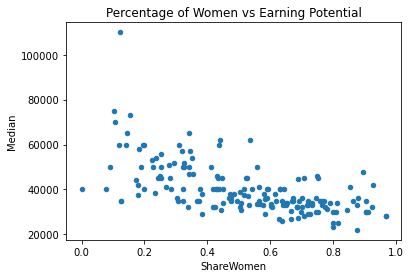

In [17]:
#Scatter plot of Percentage of women and Earning Potential
recent_grads.plot(x = 'ShareWomen',y = 'Median', kind='scatter', 
                  title="Percentage of Women vs Earning Potential")

There is a weak correlation between percentage of women and their earning potential. As the percentage of women increased in a certain major, the earning potential gradually decreased. Hence, we can say that the majors with majority of women tend to get paid less and the opposit also seems to be right. The majors where men are a majority tend to get paid more. Probably some of the male dominated and more riskier job profiles pays more. We can verify it with the table below.

In [18]:
recent_grads[['Major','Men','Women', 'Sample_size', 'Median', 'ShareWomen']].sort_values('ShareWomen').head(10)

,Major,Men,Women,Sample_size,Median,ShareWomen
73,MILITARY TECHNOLOGIES,124.0,0.0,4,40000,0.000000
66,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,4419.0,371.0,71,40000,0.077453
26,CONSTRUCTION SERVICES,16820.0,1678.0,295,50000,0.090713
1,MINING AND MINERAL ENGINEERING,679.0,77.0,7,75000,0.101852
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1123.0,135.0,16,70000,0.107313
8,MECHANICAL ENGINEERING,80320.0,10907.0,1029,60000,0.119559
0,PETROLEUM ENGINEERING,2057.0,282.0,36,110000,0.120564
106,TRANSPORTATION SCIENCES AND TECHNOLOGIES,13257.0,1893.0,180,35000,0.124950
111,FORESTRY,3156.0,451.0,48,35000,0.125035
11,AEROSPACE ENGINEERING,12953.0,2105.0,147,60000,0.139793


In [19]:
recent_grads[['Major','Men','Women', 'Sample_size', 'Median', 'ShareWomen']].sort_values(
    'ShareWomen', ascending=False).head(10)

,Major,Men,Women,Sample_size,Median,ShareWomen
164,EARLY CHILDHOOD EDUCATION,1167.0,36422.0,342,28000,0.968954
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,1225.0,37054.0,95,28000,0.967998
51,MEDICAL ASSISTING SERVICES,803.0,10320.0,67,42000,0.927807
138,ELEMENTARY EDUCATION,13029.0,157833.0,1629,32000,0.923745
150,FAMILY AND CONSUMER SCIENCES,5166.0,52835.0,518,30000,0.910933
100,SPECIAL NEEDS EDUCATION,2682.0,26057.0,246,35000,0.906677
156,HUMAN SERVICES AND COMMUNITY ORGANIZATION,885.0,8489.0,89,30000,0.905590
151,SOCIAL WORK,5137.0,48415.0,374,30000,0.904075
34,NURSING,21773.0,187621.0,2554,48000,0.896019
88,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,1589.0,11797.0,81,36000,0.881294


In one of the top five high paying jobs, the female population is less than 15 percent. The majors where female percentage is more than 90%, except for one major all the others are in the last 72 ranks in terms of earning potential.

Here the conclusion I can draw is that some of the male dominated professions earn way more than women dominated majors.

## Full Time Employement and Earning Potential

This scatter plot will check if there is any relationship between full time employment and earning potential. Are people with full time jobs year round getting higher salaries?

<AxesSubplot:title={'center':'Full Time Year Round Employement vs Earning Potential'}, xlabel='Full_time_year_round', ylabel='Median'>

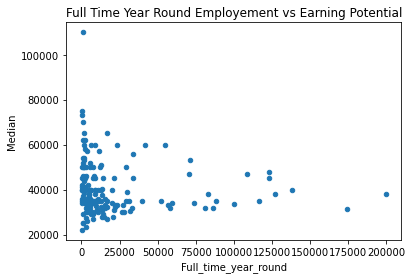

In [25]:
#Scatter plot for Full Time Employement and Earning Potential 
recent_grads.plot(x ='Full_time_year_round',y = 'Median', kind='scatter', title="Full Time Year Round Employement vs Earning Potential")

It appears that only a small number of people with full time employement year round get higher earnings. This interesting value could also be due to small sample sizes.

#### Full Time vs Earning Potential

<AxesSubplot:title={'center':'Full Time v/s Earning Potential'}, xlabel='Full_time', ylabel='Median'>

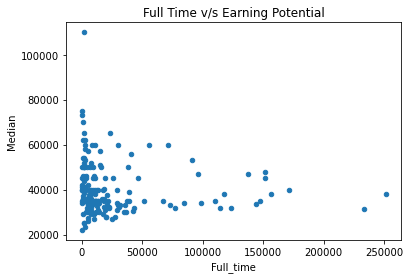

In [26]:
#Scatter Plot  for full time and earning potential
recent_grads.plot(x ='Full_time',y ='Median', kind='scatter', 
                  title="Full Time v/s Earning Potential")

Let's look at that of part time as well

<AxesSubplot:title={'center':'Part Time v/s Earning Potential'}, xlabel='Part_time', ylabel='Median'>

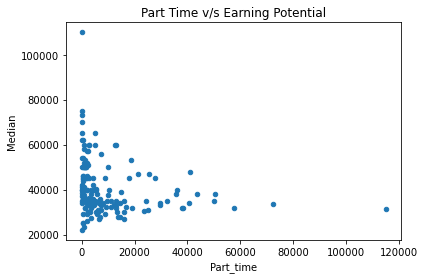

In [27]:
recent_grads.plot(x ='Part_time', y ='Median', kind='scatter', 
                  title="Part Time v/s Earning Potential")

It looks like there is no relationship between Full time year round, full time and part time against the earning potential from the given data. But we can see that  very small number of people in certain majors do make higher income and the opposite is also true. It could be because of small sample size or the nature of the major.

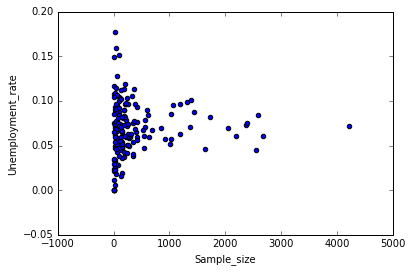

In [11]:
#Scatter plot of sample_size vs Unemployment_rate
ax = recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter')
ax.set_title('Sample_size vs Unemployment_rate')

### Normalising the full/part time jobs

For the sake of better analysis, let us find the percentage of number of people in full time and part time jobs. In order to do that, we will find the fraction of these people out of the total number of people in a major.

In [28]:
# Finding the fraction out of Total

fullyear_round_percentage = recent_grads['Full_time_year_round']/recent_grads['Total']
fulltime_percentage = recent_grads['Full_time']/recent_grads['Total']
parttime_percentage = recent_grads['Part_time']/recent_grads['Total']


# Adding it to the dataframe

recent_grads['fullyear_round_percentage']=fullyear_round_percentage
recent_grads['fulltime_percentage']=fulltime_percentage
recent_grads['Parttime_percentage']=parttime_percentage


recent_grads.head(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,fullyear_round_percentage,fulltime_percentage,Parttime_percentage
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,0.018381,110000,95000,125000,1534,364,193,0.516032,0.790509,0.115434


Now let us create a scatter plot using the newly created values and see if there are any changes.

<AxesSubplot:title={'center':'Full Time Year Round Employement Percantage vs Earning Potential'}, xlabel='fullyear_round_percentage', ylabel='Median'>

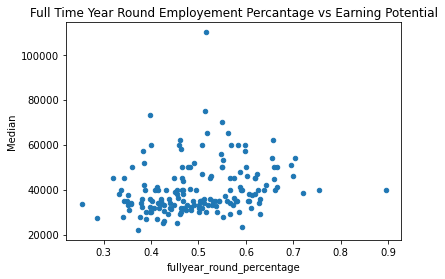

In [30]:
#Scatter plot for full time year round percentage and Earning potential
recent_grads.plot(x = 'fullyear_round_percentage', y ='Median', kind='scatter', 
                  title="Full Time Year Round Employement Percantage vs Earning Potential")

<AxesSubplot:title={'center':'Full Time Percentage vs Earning Potential'}, xlabel='fulltime_percentage', ylabel='Median'>

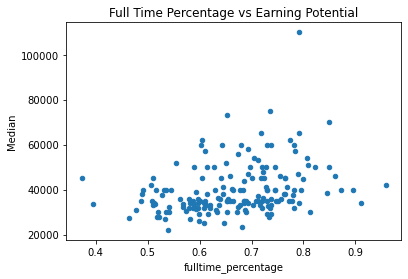

In [31]:
#Scatter plot for full time percentage and earning potential
recent_grads.plot(x ='fulltime_percentage', y ='Median', kind='scatter', 
                  title="Full Time Percentage vs Earning Potential")

<AxesSubplot:title={'center':'Part Time Percentage vs Earning Potential'}, xlabel='Parttime_percentage', ylabel='Median'>

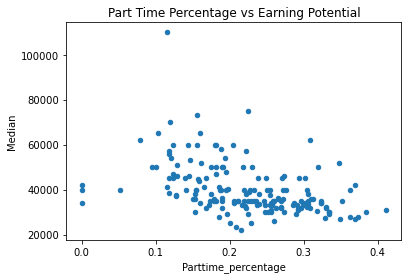

In [32]:
#Scatter plot for part time percentage and earning potential
recent_grads.plot(x ='Parttime_percentage', y ='Median', kind='scatter', 
                  title="Part Time Percentage vs Earning Potential")

In these plots we can see a very weak relationship between the percentages and the earning potential.

In the case of Full time jobs, as the percentage increased, the earning potential also increased slightly. But for part time jobs, the earning potential decreased very slightly with the increase in percentage of number of people in a particular major with part time jobs. Also there are only less than 50% people that are into part time jobs out of the total number of people in a major.

So the conclusion is that Part time jobs are not in high demand. It does not offer high earning potential for a majority of people.

We can also look into the actual dataset to get an idea about this conclusion.

In [33]:
recent_grads[['Major','fullyear_round_percentage','fulltime_percentage', 'Parttime_percentage','Sample_size', 'Median', 'Total']
            ].sort_values('Median', ascending=False).head(10)

,Major,fullyear_round_percentage,fulltime_percentage,Parttime_percentage,Sample_size,Median,Total
0,PETROLEUM ENGINEERING,0.516032,0.790509,0.115434,36,110000,2339.0
1,MINING AND MINERAL ENGINEERING,0.513228,0.735450,0.224868,7,75000,756.0
2,METALLURGICAL ENGINEERING,0.397196,0.651869,0.155374,3,73000,856.0
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.550079,0.849762,0.119237,16,70000,1258.0
4,CHEMICAL ENGINEERING,0.517576,0.718227,0.160570,289,65000,32260.0
5,NUCLEAR ENGINEERING,0.563156,0.792072,0.102604,17,65000,2573.0
6,ACTUARIAL SCIENCE,0.657135,0.774159,0.078369,51,62000,3777.0
7,ASTRONOMY AND ASTROPHYSICS,0.461496,0.605469,0.308594,10,62000,1792.0
10,COMPUTER ENGINEERING,0.568605,0.729743,0.123875,399,60000,41542.0
13,MATERIALS SCIENCE,0.459687,0.642907,0.205188,22,60000,4279.0


In [34]:
recent_grads[['Major','fullyear_round_percentage','fulltime_percentage', 'Parttime_percentage','Sample_size', 'Median', 'Total']
            ].sort_values('Median').head(10)

,Major,fullyear_round_percentage,fulltime_percentage,Parttime_percentage,Sample_size,Median,Total
172,LIBRARY SCIENCE,0.373406,0.540073,0.215847,2,22000,1098.0
171,COUNSELING PSYCHOLOGY,0.591872,0.681799,0.208604,21,23400,4626.0
169,EDUCATIONAL PSYCHOLOGY,0.424317,0.647512,0.200420,7,25000,2854.0
170,CLINICAL PSYCHOLOGY,0.455603,0.607470,0.228330,13,25000,2838.0
168,ZOOLOGY,0.428351,0.599715,0.260435,47,26000,8409.0
167,COMPOSITION AND RHETORIC,0.413233,0.534005,0.348863,151,27000,18953.0
166,DRAMA AND THEATER ARTS,0.390552,0.581447,0.369812,357,27000,43249.0
165,OTHER FOREIGN LANGUAGES,0.286862,0.463852,0.328900,56,27500,11204.0
164,EARLY CHILDHOOD EDUCATION,0.551970,0.733433,0.186251,342,28000,37589.0
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,0.377753,0.521827,0.362131,95,28000,38279.0


Now I will create some scatter plot to visualise Rank vs Full time year round percentage, Rank vs Full time percentage and Rank vs Part time percentage.

Text(0, 0.5, 'Part Time %')

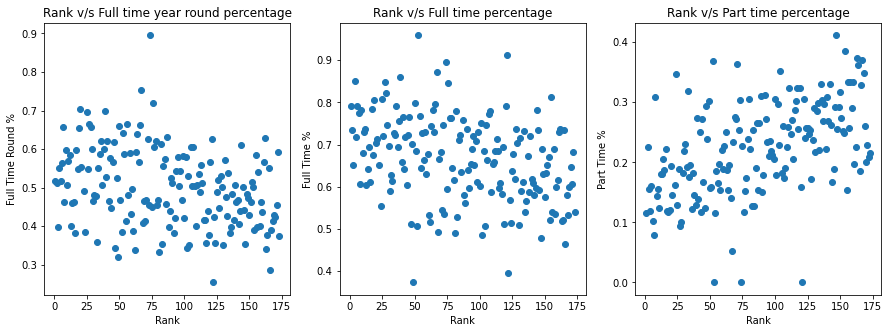

In [37]:
#Creating 3 subplots 

fig=plt.figure(figsize=(15,5))
pl1=fig.add_subplot(1,3,1)
pl2=fig.add_subplot(1,3,2)
pl3=fig.add_subplot(1,3,3)

# Creating 1st plot : Rank v/s Full time year round percentage

pl1.scatter(recent_grads['Rank'], recent_grads['fullyear_round_percentage'])
pl1.set_title('Rank v/s Full time year round percentage')
pl1.set_xlabel('Rank')
pl1.set_ylabel('Full Time Round %')

# Creating 2nd plot : Rank v/s Full time percentage

pl2.scatter(recent_grads['Rank'], recent_grads['fulltime_percentage'])
pl2.set_title('Rank v/s Full time percentage')
pl2.set_xlabel('Rank')
pl2.set_ylabel('Full Time %')

# Creating 3rd plot : Rank v/s Part time  percentage

pl3.scatter(recent_grads['Rank'], recent_grads['Parttime_percentage'])
pl3.set_title('Rank v/s Part time percentage')
pl3.set_xlabel('Rank')
pl3.set_ylabel('Part Time %')

The correlation here is not strong, but we can see that full time percentage slightly decreases with less paying majors while there are more part time jobs available with less paying majors.

I can conclude that high paying jobs have more full time job offers while low paying majors offer more part time jobs.

## College/Non College jobs and Influence of Income

Now let us briefly look into the different type of jobs out there and how higher earning potential can influence it. We are going to create visualisations for Rank vs Number of College Jobs, Rank vs nnumber of Non College Jobs and Rank vs Low Wage Jobs.

Text(0, 0.5, 'No. of Low Wage jobs')

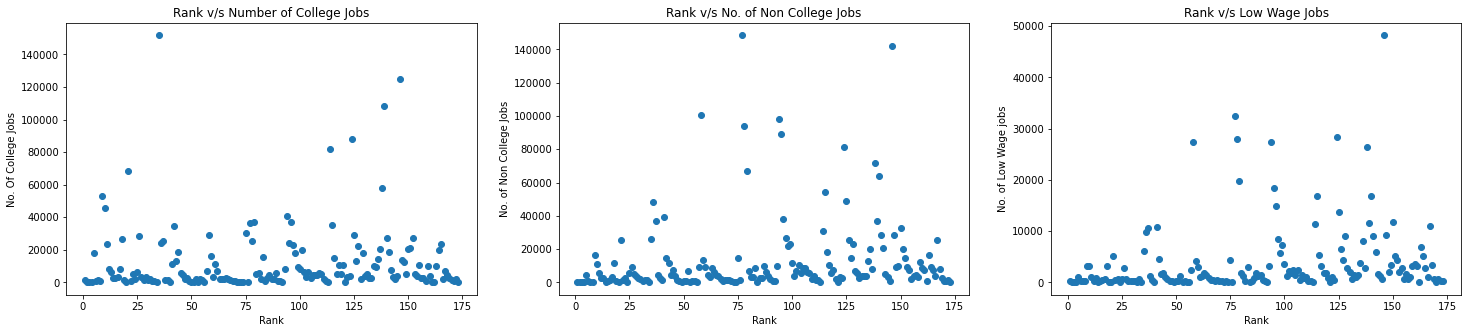

In [38]:
# Creating 3 subplots 

fig=plt.figure(figsize=(25,5))
pl4=fig.add_subplot(1,3,1)
pl5=fig.add_subplot(1,3,2)
pl6=fig.add_subplot(1,3,3)


# Creating plot: Rank v/s Number of College Jobs

pl4.scatter(recent_grads['Rank'], recent_grads['College_jobs'])
pl4.set_title('Rank v/s Number of College Jobs')
pl4.set_xlabel('Rank')
pl4.set_ylabel('No. Of College Jobs')


# Creating plot:Rank v/s No. of Non College Jobs

pl5.scatter(recent_grads['Rank'], recent_grads['Non_college_jobs'])
pl5.set_title('Rank v/s No. of Non College Jobs')
pl5.set_xlabel('Rank')
pl5.set_ylabel('No. of Non College Jobs')


# Creating plot:Rank v/s Low Wage Jobs

pl6.scatter(recent_grads['Rank'], recent_grads['Low_wage_jobs'])
pl6.set_title('Rank v/s Low Wage Jobs')
pl6.set_xlabel('Rank')
pl6.set_ylabel('No. of Low Wage jobs')

Looks like types of jobs don't have much relationship with earning potential. All types of jobs are very less over various majors.

## Frequency Analysis

Now that I have looked into the correlations between various factors, I will try to find the frequency distribution of certain factors using Histograms.

Text(0, 0.5, 'Frequency')

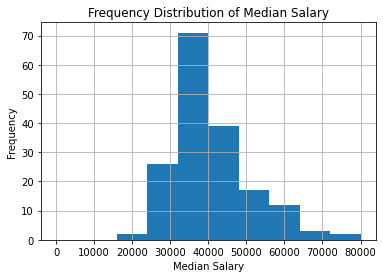

In [39]:
# Checking the frequency distribution of Median Salary

h1=recent_grads['Median'].hist(bins=10, range=(0,80000))
h1.set_title("Frequency Distribution of Median Salary")
h1.set_xlabel("Median Salary")
h1.set_ylabel("Frequency")

The histogram above indicates that the majority of people are earning a salary between 30000 and 40000. A very small percentage of the people are earning the highest salary. And a similarly small percentage of people are earning the least amount of salary as well.

Text(0, 0.5, 'Frequency')

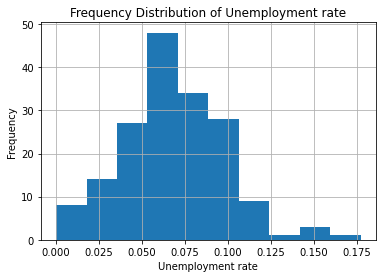

In [40]:
# Checking the frequency distribution of Unemployment

h1=recent_grads['Unemployment_rate'].hist()
h1.set_title("Frequency Distribution of Unemployment rate")
h1.set_xlabel("Unemployment rate")
h1.set_ylabel("Frequency")

#### Highest unemployment rate in any major is between 5 to 7.5%

Text(0, 0.5, 'Frequency')

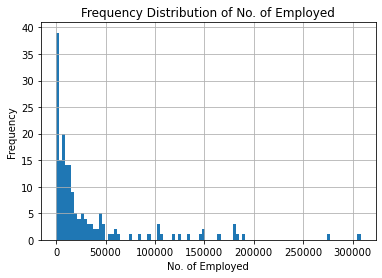

In [41]:
# Checking the frequency distribution of No. of Employed

h1=recent_grads['Employed'].hist(bins=100,)
h1.set_title("Frequency Distribution of No. of Employed")
h1.set_xlabel("No. of Employed")
h1.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

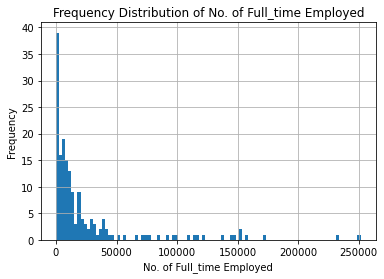

In [42]:
# Checking the frequency distribution of No. of Full_time Employed

h1=recent_grads['Full_time'].hist(bins=100,)
h1.set_title("Frequency Distribution of No. of Full_time Employed")
h1.set_xlabel("No. of Full_time Employed")
h1.set_ylabel("Frequency")

A very small number of people are employed full time as compared to the whole set. This could be due to small sample size.

Text(0, 0.5, 'Frequency')

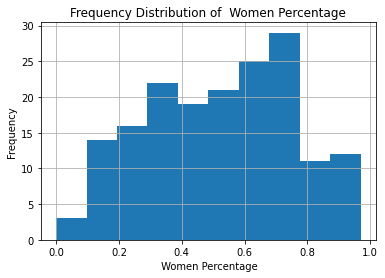

In [43]:
# Checking the frequency distribution of Women Percentage

h1=recent_grads['ShareWomen'].hist()
h1.set_title("Frequency Distribution of  Women Percentage")
h1.set_xlabel(" Women Percentage")
h1.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

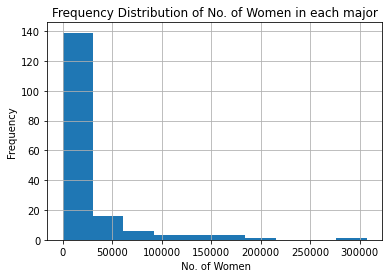

In [44]:
# Checking the frequency distribution of no. of Women 

h1=recent_grads['Women'].hist()
h1.set_title("Frequency Distribution of No. of Women in each major")
h1.set_xlabel(" No. of Women")
h1.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

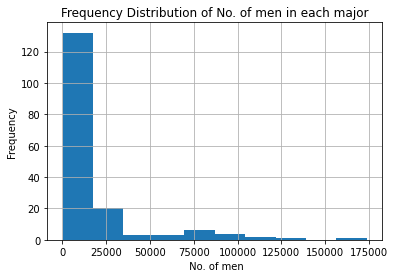

In [45]:
# Checking the frequency distribution of no. of men 

h1=recent_grads['Men'].hist()
h1.set_title("Frequency Distribution of No. of men in each major")
h1.set_xlabel(" No. of men")
h1.set_ylabel("Frequency")

After analysing the men, women and percentage of women, I can see that there are about 10% of the majors is dominated by women, while another 10% is dominated by men. When I compare the area of the histogram of women percentage, I can see in total that the percentage of women is more in all majors put together.

Text(0, 0.5, 'Frequency')

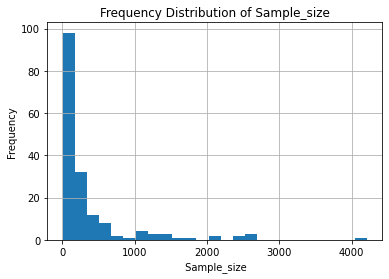

In [46]:
# Checking the frequency distribution of Sample_size

h1=recent_grads['Sample_size'].hist(bins=25)
h1.set_title("Frequency Distribution of Sample_size")
h1.set_xlabel(" Sample_size")
h1.set_ylabel("Frequency")

Here we can see that the sample size is very small for majority of the data I have. This could have actually affected most of my analyis.

## Application of Scatter Matrix

We will now generate a scatter matrix plot to combine both scatter plots and histograms into one grid of plots. This will allow us to explore potential relationships and distributions simultaneously.

The scatter_matrix function is part of the pandas.plotting module and needs to be imported separately.

In [47]:
#Importing the scatter matrix from pandas.plotting library

from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

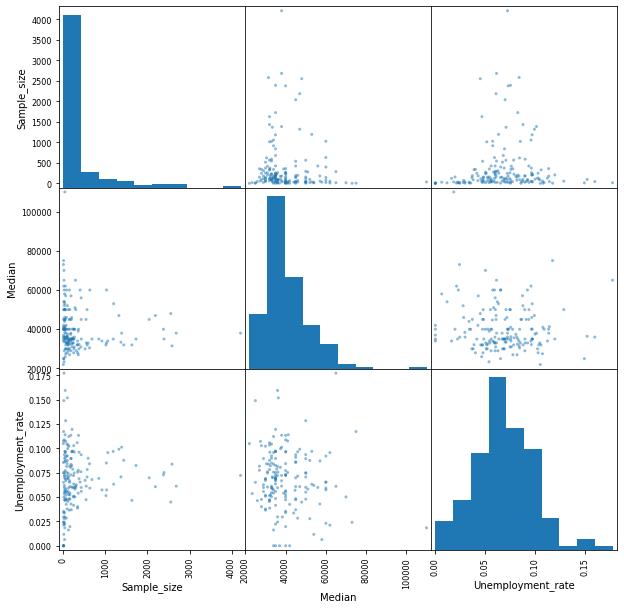

In [48]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

From the scatter matrix above, we can see that when the sample size is smaller, unemploment rate and median of earning fluctuated from low to high. Since this is does not offer any correlation, we can't clearly find a relationship between Median and unemployement rate.

array([[<AxesSubplot:xlabel='Total', ylabel='Total'>,
        <AxesSubplot:xlabel='Median', ylabel='Total'>],
       [<AxesSubplot:xlabel='Total', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

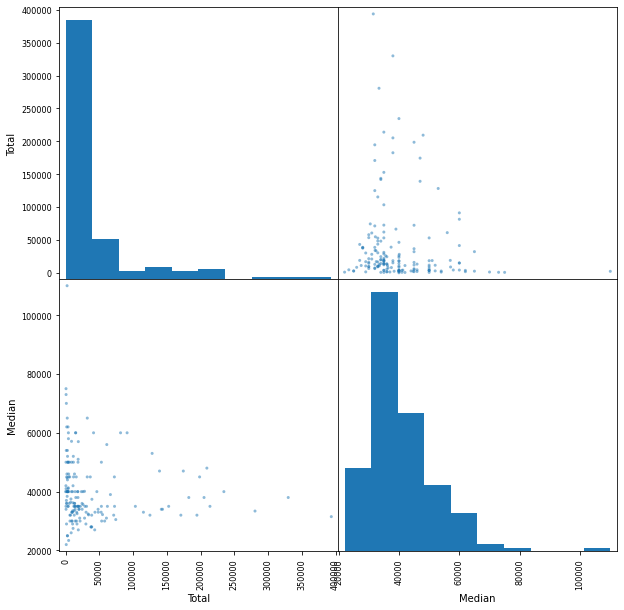

In [49]:
scatter_matrix(recent_grads[['Total','Median']], figsize=(10,10))

Due to the small sample sizes, it looks like both high paying and low paying jobs are concentrated at the least popular ( with less number of total people enrolled) side.

<AxesSubplot:title={'center':'Share of women in the 10 courses with the highest median salary'}, xlabel='Major'>

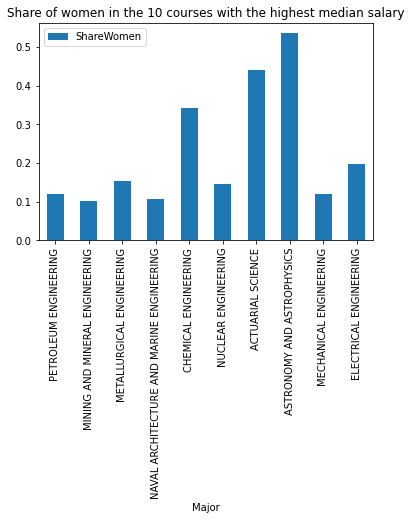

In [56]:
recent_grads[:10].plot.bar(
    x = 'Major', y = 'ShareWomen', title ='Share of women in the 10 courses with the highest median salary')

<AxesSubplot:title={'center':'Share of women in the 10 courses with the highest median salary'}, xlabel='Rank'>

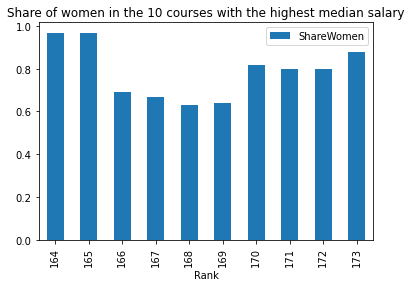

In [58]:
recent_grads.tail(10).plot.bar(
    x='Rank', y='ShareWomen',title='Share of women in the 10 courses with the highest median salary')

We can see that our previous observations have proved to be right again with these bar charts. The highest paying majors have less female participation while the lowest paying majors have more female percentage.

Let us verify the Unemployment rate as well for the top and bottom 10 majors based on its earning potential.

<AxesSubplot:title={'center':'Unemployment Rate in Top Paying Majors'}, xlabel='Major'>

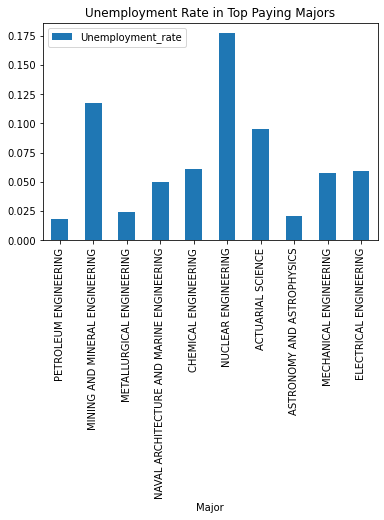

In [55]:
recent_grads.head(10).plot.bar(x='Rank', y='Unemployment_rate', 
                               title='Unemployment Rate in Top Paying Majors')

<AxesSubplot:title={'center':'Unemployment Rate in Least Paying Majors'}, xlabel='Major'>

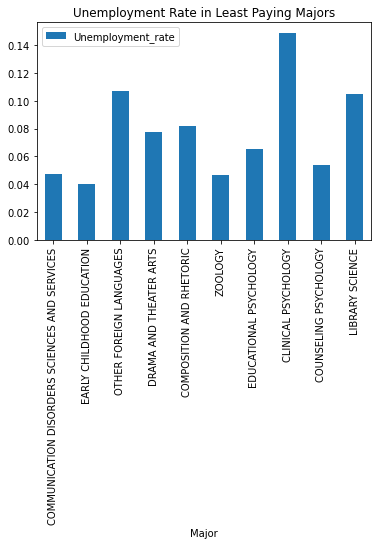

In [59]:
recent_grads.tail(10).plot.bar(x='Major', y='Unemployment_rate', title='Unemployment Rate in Least Paying Majors')

Compared to the highest paying majors, the 10 lowest paying majors have a higher unemployment rate on an average. Though smaller sample size of the high paying majors might have skewed the observation

### Finding Popular Major category and its Male and Female participation

<ipython-input-60-7bb1aaaee51c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.bar(figsize=(13, 7))


<AxesSubplot:xlabel='Major_category'>

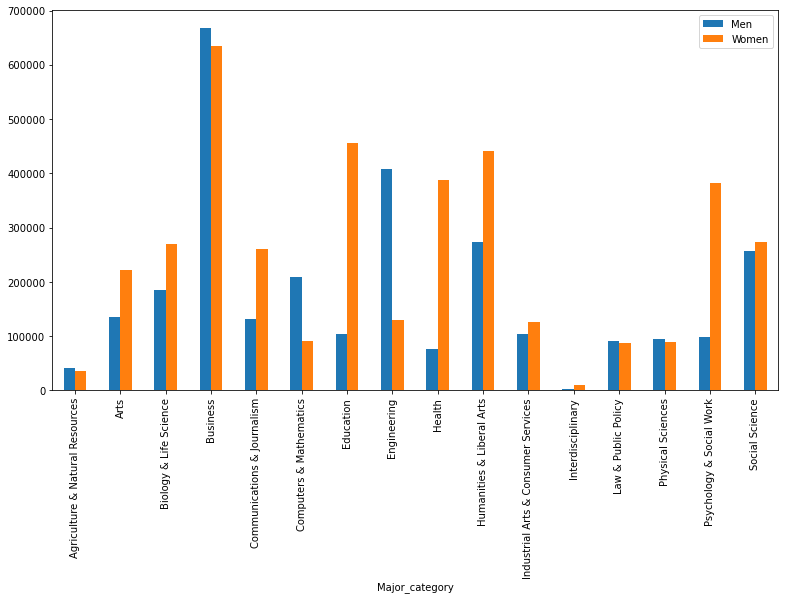

In [60]:
recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.bar(figsize=(13, 7))

Observations:
* The most popular category is Business, where the proportion men/women is close to equal.
* The least popular category is Interdiciplinary.
* Law & Public Policy, Physical Sciences and Industrial Arts & Consumer Services have a similar proportion of men and women.
* Big disparity in the categories Education, Health, and Psychology & Social Work. Women are the absolute majority here.
* The Engineering category is male dominated.

#### I'm now going to use a box plot to explore the distributions of median salaries and unemployment rate.

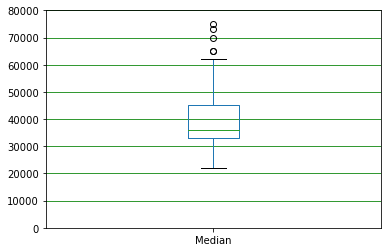

In [61]:
#Median 
recent_grads['Median'].plot(kind='box', ylim=(0,80000)).grid(color='green', axis='y')

Observations:
* Half of the majors have a salary between 35k and 60k
* The lowest median wage for the major courses is around 22k.
* There are a few of outliers with salaries above 60k

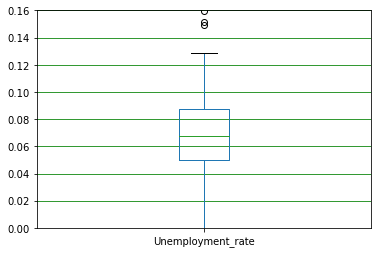

In [63]:
#Unemployment rate
recent_grads['Unemployment_rate'].plot(kind='box', ylim=(0,0.16)).grid(color='green', axis='y')

Observations:

* 75% of the majors have unemployment rate below 9 percent.
* About 50% majors have the unemployment rate ranging from 5% - 9%.
* A few outliers with unemployment rate higher than 12%.

### Conclusions
I have analysed the dataset on the job outcomes of students who graduated from college between 2010 and 2012 using various plots. Here are some of the conclusions I arrived at.

* One of the first conclusions and an important disclaimer for this whole analysis would the small sample size. In the case of top ranked majors, the sample size available was very small which could have negatively affected the analysis.


* Full time employement rate is higher for more popular majors. It appears more people are opting for popular majors for this reason.


* Popularity of the major doesn't have much to do with earning. Some of the least popular majors(with less number of total people enrolled) are actually high paying majors. These are some of the very highly specialised majors as well as majors that are difficult to get into.


* In the case of Full time jobs, as the percentage increased, the earning potential also increased slightly.


* Part time jobs are not in demand. It also doesn't offer higher earning potential for the majority of people.


* High paying majors have more full time job offers while low paying majors offer more part time jobs.


* The majority of people are earning a salary between 30000 and 40000 dollars. A very small percentage of them are earning the highest salary. Same is true for lowest salary as well.


* Total percentage of women is more in all majors put together.


* The highest paying majors have less female participation while the lowest paying majors have more female percentage.


* Business is the most in demand Major category and both men and women are pursuing it. Though there is a slight increase in the number of men.


* Highest paid majors have a smaller number of enrollment. They are very specialised majors such as Petroleum Engineering. Some involve certain risk factors so these majors have less people joining. But at the same time it pays well. Due to some reasons, men are dominating these fields at the time of data collection. Maybe as time goes on women will taken over these fields.